# Module 2 R Notebook
# Data Preprocessing

## Important note - read first

In this course, you are not required to become proficient in writing R scripts for Big Biomedical Data Analytics. The assignments will be based on each module's template, and replacing some parts of them with new data and parameters so that you will get new results and interpret them. 

Understanding all the coding details in R will depend on your bakcground knowledge in programming concepts. 

Therefore if you do not understand all the coding details in R, try to run the code and understand mostly: 

1) what information do I have to provide to this script to make it work ?

2) how to execute this script (it will always be: run the cell containing the script Cell --> Run cells, or click on SHIFT + ENTER at the same time, or simply click on the right arrow icon) ?

3) what results do I get ?

4) how to interpret the results ?

Little by little, you will become familiar with R programming language and, example after example, you will understand the scripts and be ready for more advanced programming work. 

## Introduction to R scripts

R scripts are similar to programs you run at the command line. In a notebook, the command line runs in a cell preceded by "In [ ]:".

A program can be understood as a recipe for transforming data into interesting information or knowledge, sometimes with graphics. It is similar to a cooking recipe or assembly instructions for furniture. 

A program is made of code, some related to data, and some related to processes, representing the actions we perform on the data.

The data is stored in variables, and the processes are represented in individual instructions. Data correspond to the ingredients in a recipe, or pieces that will be used to assemble a piece of furniture. Instructions are - well - the instructions in a cooking recipe or a furniture assembly document. The order of the instructions is very important.

A variable is similar to a cell in an Excel spreadsheet, we place data into the variable through an assignment, represented by the symbol "<-" in R.

It is preferable to write one instruction by line.

In this notebook and the assignments, you are invited to use the current module notebook as a template that you modify to answer the questions in the assignment.

We also want to add some comments to our code so that we can remember when we re-read it why we are using this code. Comments in R are preceded by the '#' symbol.

## Assignment goals

This assignment has for goal to preprocess a dataset with data about heart disease. The dataset comes from the Machine Learning repository (https://archive.ics.uci.edu/ml/datasets/Heart+Disease) and is a real medical dataset. The list of variables in the dataset and their meaning is the following:

age: age in years

sex: sex (1 = male; 0 = female) 

chest_pain: chest pain type 
-- Value 1: typical angina 
-- Value 2: atypical angina 
-- Value 3: non-anginal pain 
-- Value 4: asymptomatic 

trestbps: resting blood pressure (in mm Hg on admission to the hospital) 

chol: serum cholestoral in mg/dl 

fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 

restecg: resting electrocardiographic results 
-- Value 0: normal 
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or 
            depression of > 0.05 mV) 
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 

thalach: maximum heart rate achieved 

exang: exercise induced angina (1 = yes; 0 = no) 

oldpeak = ST depression induced by exercise relative to rest 

slope: the slope of the peak exercise ST segment 
-- Value 1: upsloping 
-- Value 2: flat 
-- Value 3: downsloping 

ca: number of major vessels (0-3) colored by flourosopy 

thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 

num: diagnosis of heart disease (angiographic disease status) 
-- Value 0: < 50% diameter narrowing 
-- Value 1: > 50% diameter narrowing 
(in any major vessel: attributes 59 through 68 are vessels) 

Since 'num' represents the narrowing of the arteries, a narrowing of 50% is considered good heart health, and a narrowing greater than 50% is considered poor heart health.

So let us get started !


## Preparing the environment
Just like when you are cooking, you first prepare your work environment. This is done in R by loading the libraries containing the functions you are going to use in the assignment.

In R, you first prepare your environment by adding the libraries into your R workspace. This is done only once. There are several ways of loading the libraries, the main ones being:

1) install.packages("ggplot2", repos="http://cran.us.r-project.org")

2) for Bioconductor packages, use: 

source("https://bioconductor.org/biocLite.R")
biocLite("class")

Once the packages have been loaded, the corresponding library is available, however each time you want to use some of its functions, you have to load it with 'library', for example:

library(ggplot2)
library(class)

In your Coursera workspace, all the libraries have already been installed, therefore you only need to load them as needed.

In the example below, we are going to use 5 different libraries, so we first load them in the workspace through the five following lines.

In [3]:
library(RWeka)
library(mice)
library(Hmisc)
library(VIM)
library(ggplot2)

Loading required package: Rcpp
mice 2.25 2015-11-09
Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, round.POSIXt, trunc.POSIXt, units

Loading required package: colorspace
Loading required package: grid
Loading required package: data.table
VIM is ready to use. 
 Since version 4.0.0 the GUI is in its own package VIMGUI.

          Please use the package to use the new (and old) GUI.

Suggestions and bug-reports can be submitted at: https://github.com/alexkowa/VIM/issues

Attaching package: ‘VIM’

The following object is masked from ‘package:datasets’:

    sleep



## Loading the data
The data to  analyze is stored in a dataset called 'heart-ch.txt' under the 'readonly' directory. It is a comma-delimited file and has the list of variables on the first line.
The function we use to read this file is called 'read.table'. It will read the file and place it in a table similar to an Excel spreadsheet called a dataframe. We provide to this function some argument to let it know that the first line has the list of variables ('header = TRUE'), the data are separated by a comma ('sep=","'), and that character strings are not enquoted ('quotes=""').
'class(dataset)' displays the type of the variable dataset, containing the data, which is a dataframe. 

In [16]:
# cell #1
dataset <- read.table("readonly/heart-h.txt", header = TRUE, sep=",", quote="")
class(dataset)

[1] "data.frame"

Since a dataframe such as 'dataset' is like a spreadsheet, we can display its number of rows, number of columns, dimension (number of rows and columns), its first 6 lines ('head'), and a summary of its variables ('summary'), which provides for each variable or column a set of statistics such as 
Minimum      (smallest value)
1st quartile (value for which about 25% of the samples are below it)
Median       (value for which about half of the samples are below it)
3rd quartile (value for which about 75% of the samples are below it)
Maximum      (largest value)
NA's or number of missing values (a missing value is indicated by NA in this dataset).

In [17]:
# cell #2
nrow(dataset) # number of rwos
ncol(dataset) # number of columns
dim(dataset) # number of rows and columns
head(dataset, 0) # returns the list of variables
summary(dataset) # descriptive statistics

[1] 294

[1] 14

[1] 294  14

,age,sex,chest_pain,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


      age            sex            chest_pain     trestbps          chol      
 Min.   :28.00   female: 81   asympt     :123   Min.   : 92.0   Min.   : 85.0  
 1st Qu.:42.00   male  :213   atyp_angina:106   1st Qu.:120.0   1st Qu.:209.0  
 Median :49.00                non_anginal: 54   Median :130.0   Median :243.0  
 Mean   :47.83                typ_angina : 11   Mean   :132.6   Mean   :250.8  
 3rd Qu.:54.00                                  3rd Qu.:140.0   3rd Qu.:282.5  
 Max.   :66.00                                  Max.   :200.0   Max.   :603.0  
                                                NA's   :1       NA's   :23     
   fbs                       restecg       thalach       exang    
 f   :266   left_vent_hyper      :  6   Min.   : 82.0   no  :204  
 t   : 20   normal               :235   1st Qu.:122.0   yes : 89  
 NA's:  8   st_t_wave_abnormality: 52   Median :140.0   NA's:  1  
            NA's                 :  1   Mean   :139.1             
                         

## Dealing with missing values

The first question to answer is: do we have missing values in this dataset?

From the 'summary' above, we find that some variables have NAs or missing values.

In addition, from the 'mice' package, 'md.pattern' function displays a table of the number of missing values for each column, where '0' represents a missing value, and '1' represents a present value. Each row represents an increasing number of missing values, starting with 0 missing values, then 1, etc. (right column). The left column indicates how many rows have this number of missing values. Here for example, 297 rows have no missing values.

In [18]:
# cell #3
md.pattern(dataset)  # (mice) displays all the missing values, NA for missing values

,age,sex,chest_pain,oldpeak,num,trestbps,restecg,thalach,exang,fbs,chol,slope,thal,ca,
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
9,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,2
15,1,1,1,1,1,1,1,1,1,1,1,0,1,0,2
1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,2
85,1,1,1,1,1,1,1,1,1,1,1,1,0,0,2
1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,3
1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,3
1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,3
5,1,1,1,1,1,1,1,1,1,1,0,1,0,0,3


From the 'VIM' package, we can display missing data in a different way with the 'aggr' function. This function ranks the variables by decreasing number of missing values. The variables at the top of the list are those having the most missing values. Here at the top, we have variable 'ca' with almost 50% of missing values, closely followed by 'thal', with almost 45% of missing values.


 Variables sorted by number of missings: 
   Variable       Count
         ca 0.989795918
       thal 0.904761905
      slope 0.646258503
       chol 0.078231293
        fbs 0.027210884
   trestbps 0.003401361
    restecg 0.003401361
    thalach 0.003401361
      exang 0.003401361
        age 0.000000000
        sex 0.000000000
 chest_pain 0.000000000
    oldpeak 0.000000000
        num 0.000000000


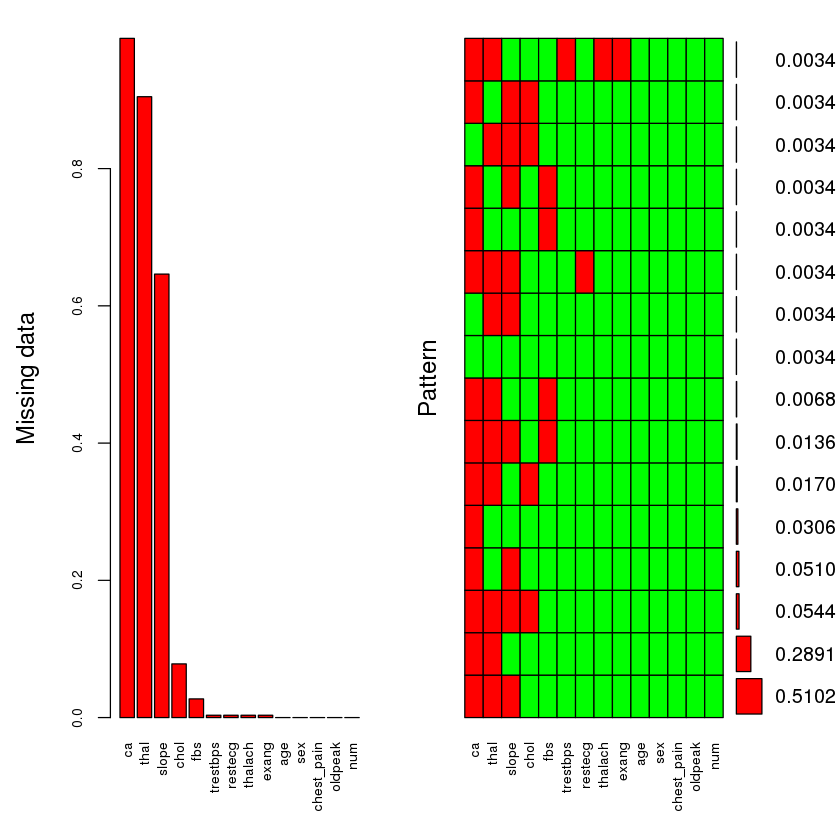

In [19]:
# cell #4
mice_plot <- aggr(dataset, col=c("green","red"),
                    numbers=TRUE, sortVars=TRUE,
                    labels=names(dataset), cex.axis=.7, ylab=c("Missing data","Pattern")) # (VIM) display graphically missing values

To deal with missing values, one main method is to impute these values, for example with the mean of the column where the missing value is located. This can be accomplished for example with the 'impute' function. In the example below, we are imputing 'chol' with its mean, and copy the results in a new variable called 'chol_imputed'. The summary of the dataset shows that the 'chol' variable, which shows 23 missing values ('NAs') in 'summary', now shows no missing value in 'chol_imputed'. We could also replace 'chol' by 'chol_imputed'. We also notice that the variable mean has not changed (248.4).

In [20]:
# cell #5
dataset[,"chol_imputed"] <- with(dataset, impute(chol, mean))  # (Hmisc) impute with mean
summary(dataset)


 23 values imputed to 250.8487 



      age            sex            chest_pain     trestbps          chol      
 Min.   :28.00   female: 81   asympt     :123   Min.   : 92.0   Min.   : 85.0  
 1st Qu.:42.00   male  :213   atyp_angina:106   1st Qu.:120.0   1st Qu.:209.0  
 Median :49.00                non_anginal: 54   Median :130.0   Median :243.0  
 Mean   :47.83                typ_angina : 11   Mean   :132.6   Mean   :250.8  
 3rd Qu.:54.00                                  3rd Qu.:140.0   3rd Qu.:282.5  
 Max.   :66.00                                  Max.   :200.0   Max.   :603.0  
                                                NA's   :1       NA's   :23     
   fbs                       restecg       thalach       exang    
 f   :266   left_vent_hyper      :  6   Min.   : 82.0   no  :204  
 t   : 20   normal               :235   1st Qu.:122.0   yes : 89  
 NA's:  8   st_t_wave_abnormality: 52   Median :140.0   NA's:  1  
            NA's                 :  1   Mean   :139.1             
                         

## Normalization

Another type of data preprocessing we may perform is to normalize variables. A function 'Normalize' exists in 'RWeka' package to normalize using ZScore normalization. This function takes a formula as an argument. A formula is some kind of mathematical formula. We see below three different formulas:

chol_imputed ~.          formula to consider all numeric variables except chol_imputed

~ chol_imputed           formula to consider only chol_imputed

~.                       formula to consider all numeric variables

Notice in the results that normalized variables now range between 0 and 1.

In [21]:
# cell #6
#dataset_n <- Normalize(chol_imputed ~., data = dataset) # (RWeka) normalizes all numeric except chol_imputed
#dataset_n <- Normalize(~ chol_imputed , data = dataset) # normalizes only chol_imputed
dataset_n <- Normalize(~. , data = dataset) # normalizes all variables
summary(dataset_n)

      age        sex          chest_pain    trestbps      chol   fbs  
 Min.   :0   female:0   asympt     :1    Min.   :0   Min.   :0   f:1  
 1st Qu.:0   male  :1   atyp_angina:0    1st Qu.:0   1st Qu.:0   t:0  
 Median :0              non_anginal:0    Median :0   Median :0        
 Mean   :0              typ_angina :0    Mean   :0   Mean   :0        
 3rd Qu.:0                               3rd Qu.:0   3rd Qu.:0        
 Max.   :0                               Max.   :0   Max.   :0        
                  restecg     thalach  exang      oldpeak   slope         ca   
 left_vent_hyper      :0   Min.   :0   no :0   Min.   :0   down:0   Min.   :0  
 normal               :1   1st Qu.:0   yes:1   1st Qu.:0   flat:1   1st Qu.:0  
 st_t_wave_abnormality:0   Median :0           Median :0   up  :0   Median :0  
                           Mean   :0           Mean   :0            Mean   :0  
                           3rd Qu.:0           3rd Qu.:0            3rd Qu.:0  
                       

## Discretization

Another type of data preprocessing is to discretize the data, for example by associating them to bins. Main methods are equal-width and equal-depth.
Discretization can be accomplished by the 'cut2' function in several manners:

* with 'g=3' , we create 3 bins with approximately the same number of elements in each (equal-depth).

* with 'm=100', we create bins of depth 100 (equal-depth).

In the cell below, we refer to a particular column in the dataset, here 'chol_imputed'. In order to reference this column, we can use either 'cut2$chol_imputed' or 'cut2[,"chol_imputed"]'. These two expressions are completely equivalent.
We see in 'summary' that 'chol_bin' has three values 1, 2, and 3, each representing a bin.

In [22]:
# cell #7
dataset$chol_bin <- as.numeric(cut2(dataset$chol_imputed, g=3)) # (Hmisc) create 3 bins g = 3 quantile bins equal-depth
summary(dataset)
#head(dataset)


 23 values imputed to 250.8487 



      age            sex            chest_pain     trestbps          chol      
 Min.   :28.00   female: 81   asympt     :123   Min.   : 92.0   Min.   : 85.0  
 1st Qu.:42.00   male  :213   atyp_angina:106   1st Qu.:120.0   1st Qu.:209.0  
 Median :49.00                non_anginal: 54   Median :130.0   Median :243.0  
 Mean   :47.83                typ_angina : 11   Mean   :132.6   Mean   :250.8  
 3rd Qu.:54.00                                  3rd Qu.:140.0   3rd Qu.:282.5  
 Max.   :66.00                                  Max.   :200.0   Max.   :603.0  
                                                NA's   :1       NA's   :23     
   fbs                       restecg       thalach       exang    
 f   :266   left_vent_hyper      :  6   Min.   : 82.0   no  :204  
 t   : 20   normal               :235   1st Qu.:122.0   yes : 89  
 NA's:  8   st_t_wave_abnormality: 52   Median :140.0   NA's:  1  
            NA's                 :  1   Mean   :139.1             
                         

For an equal-width discretization, 5 bins can be created with 'cut' for example. 
We see in 'summary' that 'chol_bin' has five values 1, 2, 3, 4, and 5, each representing a bin.

In [23]:
# cell #8
dataset[,"chol_bin"] <- as.numeric(cut(dataset[,"chol_imputed"], 5)) # create bins of same width
summary(dataset)
#head(dataset)


 23 values imputed to 250.8487 



      age            sex            chest_pain     trestbps          chol      
 Min.   :28.00   female: 81   asympt     :123   Min.   : 92.0   Min.   : 85.0  
 1st Qu.:42.00   male  :213   atyp_angina:106   1st Qu.:120.0   1st Qu.:209.0  
 Median :49.00                non_anginal: 54   Median :130.0   Median :243.0  
 Mean   :47.83                typ_angina : 11   Mean   :132.6   Mean   :250.8  
 3rd Qu.:54.00                                  3rd Qu.:140.0   3rd Qu.:282.5  
 Max.   :66.00                                  Max.   :200.0   Max.   :603.0  
                                                NA's   :1       NA's   :23     
   fbs                       restecg       thalach       exang    
 f   :266   left_vent_hyper      :  6   Min.   : 82.0   no  :204  
 t   : 20   normal               :235   1st Qu.:122.0   yes : 89  
 NA's:  8   st_t_wave_abnormality: 52   Median :140.0   NA's:  1  
            NA's                 :  1   Mean   :139.1             
                         

## Data understanding

Data understanding is a data analytics step preceding data preprocessing. However it can also be used at any time during analysis to better understand the data.
Function 'ggplot' below creates a scatterplot of the data in 'dataset' representing two numeric variables: 'chol' as a function of 'age' and using two different colors for 'num'. The plot shows more narrowing of arteries in older ages.

Warning message:
: Removed 23 rows containing missing values (geom_point).

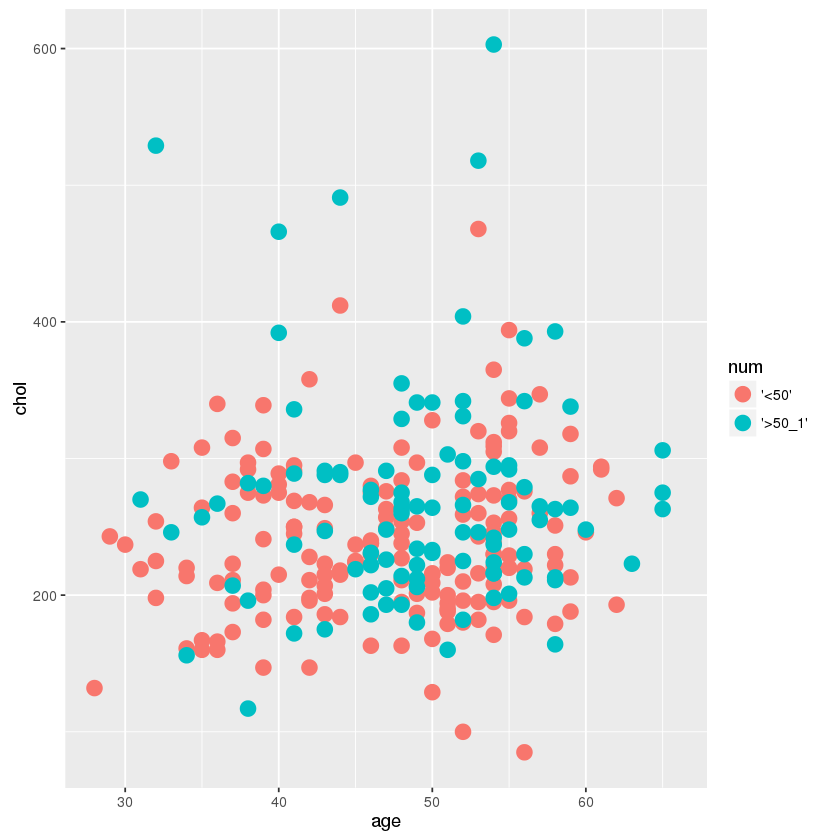

In [24]:
# cell #9
ggplot(dataset,aes(x=age,y=chol, color=num)) + geom_point(size = 4) # scatterplot (age, chol)

Another plot can be a stacked histogram for a categorical variable ('chest_pain'). The following plot shows that some types of chest pain (asymptomatic pain) are more associated with heart disease than others.

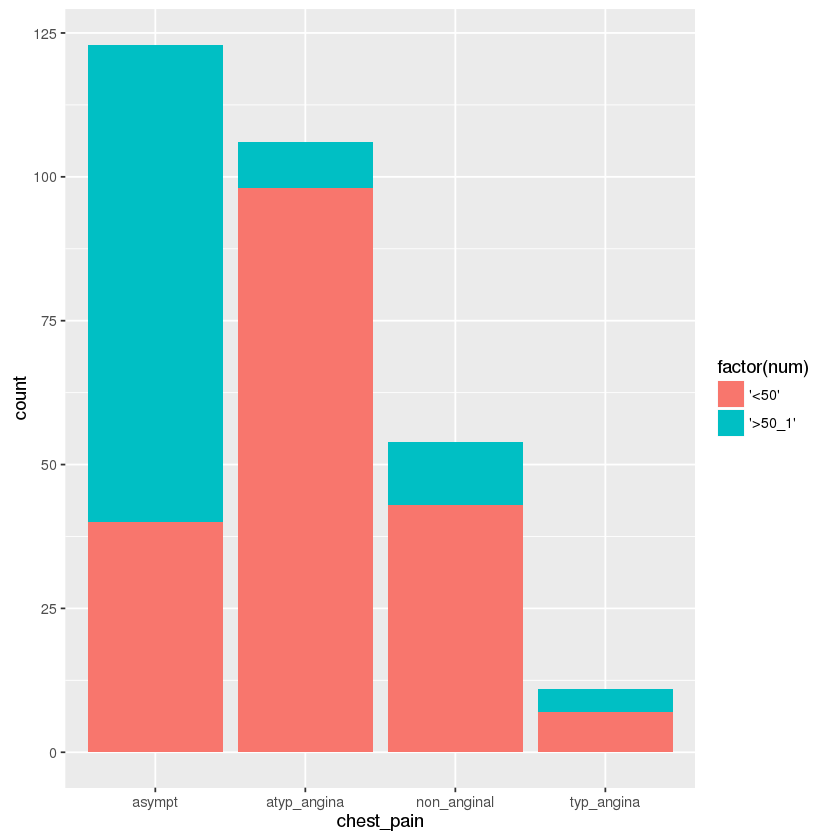

In [25]:
# cell #10
ggplot(dataset, aes(chest_pain, fill=factor(num))) + geom_bar() # stacked histogram for categorical variable

A stacked histogram can also be used for numeric variables such as 'age'. The following plot shows that heart disease is more prevalent when age increases.

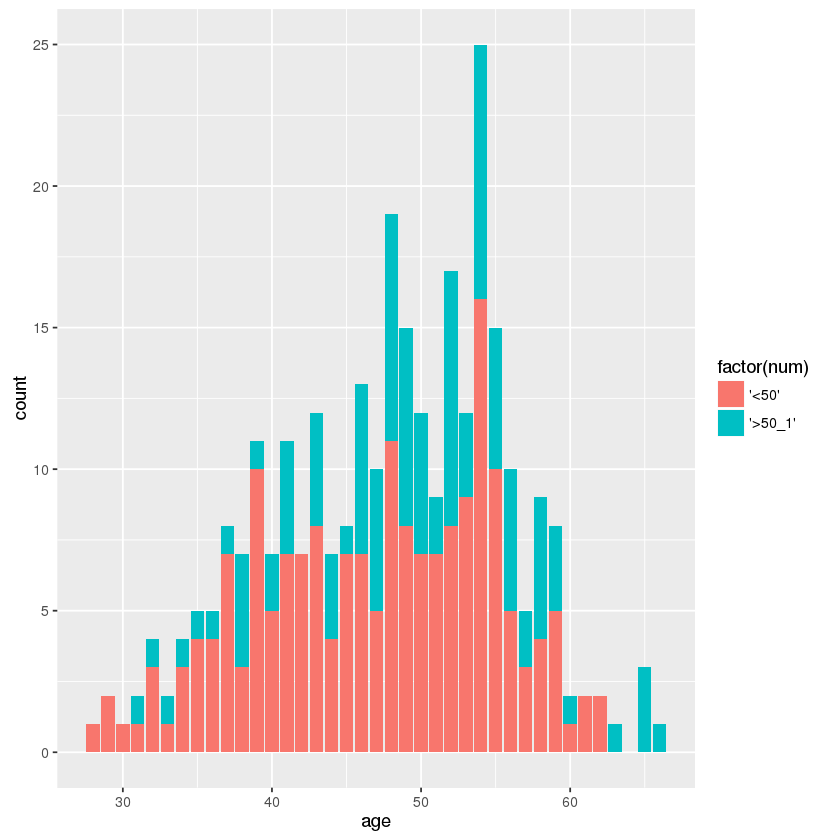

In [26]:
# cell #11
ggplot(dataset, aes(x=age, fill=factor(num))) + geom_bar() # stacked histogram for numeric variable